In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
global_temp=global_temp.dropna()
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['Year'] = global_temp['dt'].dt.year

In [107]:
global_temp=global_temp[global_temp['Year']>=1950]

(0.0, 0.00045)

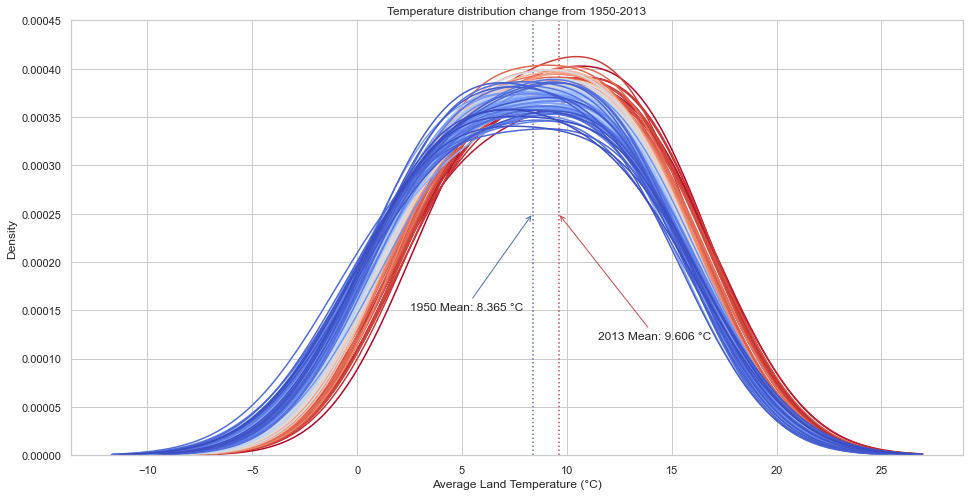

In [158]:
fig,ax = plt.subplots(figsize=(16,8))
sns.set(style="whitegrid")
sns.kdeplot(data=global_temp, x='LandAverageTemperature', hue='Year', palette='coolwarm', bw_adjust=1.4,legend=False)

mean1950  = global_temp[global_temp['Year']==1950]['LandAverageTemperature'].mean()
mean2013  = global_temp[global_temp['Year']==2013]['LandAverageTemperature'].mean()

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height1950 = np.interp(mean1950, xs, ys)
height2013 = np.interp(mean2013, xs, ys)

ax.vlines(mean1950, 0, height1950, color='b', ls=':')
ax.vlines(mean2013, 0, height2013, color='r', ls=':')

ax.annotate("1950 Mean: %s °C"%round(mean1950,3), xy = (mean1950,0.00025),
             xytext=(2.5,0.00015), arrowprops={'arrowstyle': '->', 'color': 'b'})

ax.annotate("2013 Mean: %s °C"%round(mean2013,3), xy = (mean2013,0.00025),
             xytext=(11.5,0.00012), arrowprops={'arrowstyle': '->', 'color': 'r'})

ax.set_title('Temperature distribution change from 1950-2013')
ax.set_xlabel('Average Land Temperature (°C)')
ax.set_ylim(0,0.00045)